# Project Report

In [5]:
# Dowloading packages
install.packages("GGally")
install.packages("cowplot")
install.packages("parsnip")
install.packages("hardhat")

#Run to load packages
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(GGally)
library(cowplot)
library(parsnip)
library(recipes)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.1.1     ✔ 

# Introduction:

Tennis is a popular sport among men and women all over the world. Therefore, the analysis of factors affecting performance and success is of great interest. Since tennis players' earnings can vary widely and "Prize Money” could reflect a player's earnings in tennis tournaments, understanding the determinants of prize money can provide insights into the financial success of professional tennis players (Nag, 2022). Recent research suggests that differences in prize money among tennis players are likely due to professional rankings (JEANGOUT, 2018). In professional tennis, players compete in various tournaments, accumulate ranking points, and move up or down in the rankings based on their performance. This system is used to determine tournament entries and player recognition (Nag, 2022). Therefore, we want to explore the research question: "How can we use ranking points to predict the prize money a tennis player receives?" To answer the question, we will be using the data `player_stats(1).csv` from Ultimate Tennis Statistics. This data set contains the statistics of the top 500 tennis players in the world.

# Data Description:

We use data from Ultimate Tennis Statistics. This database provides users with a variety of tennis statistics for men's tennis during the Open period, such as historical results, in-match statistics, records or all-time greats comparisons. 

The original dataset contains 500 rows and 38 columns with 500 tennis players and 37 factors of interest. We have wrangled and cleaned the dataset so that we can focus only on the variables we want to explore. We have also removed all the "NA" values. The wrangled dataset contains 407 rows and 9 columns. 

Our dependent variable is a player's earnings in tennis tournaments which is represented by `prize_money` in our model (Unit: US dollar). Since prize money is a visual reflection of tennis players' income in the game, we set prize money as the independent variable. 

Our main independent variable are `best_rank` and `current_rank`; `best_rank` represents a player's the highest rank they have achieved. This variable can impact a player's reputation, endorsements, and invitations to play in future prestige tournaments. `current_rank` represents a tennis player's current rank.  

Our control variables are `age`, `dominant_dummy` (their playing hand), and `backhand_dummy` (the use of backhand plays). 
Players of different ages may behave differently in the game. Dominant hand and the choice of backhand style can impact a player's style and game strategy, which might be reflected in their prize earnings. We transformed the qualitative variables to its respective dummy variables, 1 is for right handed while 0 is for left handed. All of these variables provide different dimensions of a player's career and can help create a more accurate model.

`age` - Player's age

`backhand_dummy` - Player's backhand style	(where 1 means "One-handed" and 0 means "Two-handed")

`best_rank` - Player's highest rank

`current_rank` - Player's current standing

`dominant_dummy` - Player's dominant hand (1 means "Right-handed" and 0 means "Left-handed)

`prize_money` - Player's prize money

In [6]:
# run to load data set
player_data <- read_csv("https://raw.githubusercontent.com/dcai01/dsci100_project/main/project_proposal/data/player_stats%20(1).csv")
num_rows <- nrow(player_data)
num_rows
num_cols <- ncol(player_data)
num_cols

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 500

[1] 38

In [3]:
head(player_data)
#The original dataset contains 500 rows and 38 columns with 500 tennis players and 37 factors of interest.

...1 Age             Country            Plays        Wikipedia Current Rank
1 0    26 (25-04-1993) Brazil             Right-handed Wikipedia 378 (97)    
2 1    18 (22-12-2001) United Kingdom     Left-handed  Wikipedia 326 (119)   
3 2    32 (03-11-1987) Slovakia           Right-handed Wikipedia 178 (280)   
4 3    21 (29-05-1998) Korea, Republic of Right-handed Wikipedia 236 (199)   
5 4    27 (21-10-1992) Australia          Right-handed Wikipedia 183 (273)   
6 5    22 (11-02-1997) Poland             Right-handed Wikipedia 31 (1398)   
  Best Rank        Name                 Backhand   Prize Money  ⋯ Facebook
1 363 (04-11-2019) Oscar Jose Gutierrez NA         NA           ⋯ NA      
2 316 (14-10-2019) Jack Draper          Two-handed $59,040      ⋯ NA      
3 44 (14-01-2013)  Lukas Lacko          Two-handed US$3,261,567 ⋯ NA      
4 130 (10-04-2017) Duck Hee Lee         Two-handed $374,093     ⋯ NA      
5 17 (11-01-2016)  Bernard Tomic        Two-handed US$6,091,971 ⋯ NA      
6 31 (20-01-2020)  Hubert Hurkacz       Two-handed $1,517,157   ⋯ NA      
  Twitter Nicknames Grand Slams Davis Cups Web Site Team Cups Olympics
1 NA      NA        NA          NA         NA       NA        NA      
2 NA      NA        NA          NA         NA       NA        NA      
3 NA      NA        NA          NA         NA       NA        NA      
4 NA      NA        NA          NA         NA       NA        NA      
5 NA      NA        NA          NA         NA       NA        NA      
6 NA      NA        NA          NA         NA       NA        NA      
  Weeks at No. 1 Tour Finals
1 NA             NA         
2 NA             NA         
3 NA             NA         
4 NA             NA         
5 NA             NA         
6 NA             NA

Run the next cell tidy up the data. We are going to select the columns of data we are interested in and rename our variables.

In [7]:
set.seed(1000)
# Run to view tidied/wrangled data
player_data$"Prize Money" <- gsub("[^0-9.-]", "", player_data$"Prize Money")

player_data_renamed <- player_data |>
    separate(Age, into = c("age", "birthday"), sep ="\\(") |>
    separate("Best Rank", into = c("best_rank", "date"), sep ="\\(") |>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    separate("Prize Money", into = c("prize_money", "dash"), sep = "-")|>
    rename(plays = Plays, backhand = Backhand, name = Name)|>
    select(name, age, plays, current_rank, best_rank, backhand, prize_money) |>
    drop_na()

player_data_renamed$dominant_dummy <- ifelse(player_data_renamed$plays == "Right-handed", 1, 0) #1 means "Right-handed" and 0 means "Left-handed	
player_data_renamed$backhand_dummy <- ifelse(player_data_renamed$backhand == "One-handed", 1, 0) #1 means "One-handed	" and 0 means "Two-handed"

player_data_renamed <- player_data_renamed |>
                       mutate(age = as.numeric(age),
                              current_rank = as.numeric(current_rank),
                              best_rank = as.numeric(best_rank),
                              prize_money = as.numeric(prize_money),
                              plays = as.numeric(plays),
                              backhand = as.numeric(backhand))

head(player_data_renamed)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 399 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `plays = as.numeric(plays)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


name           age plays current_rank best_rank backhand prize_money
1 Jack Draper    18  NA    326          316       NA         59040    
2 Lukas Lacko    32  NA    178           44       NA       3261567    
3 Duck Hee Lee   21  NA    236          130       NA        374093    
4 Bernard Tomic  27  NA    183           17       NA       6091971    
5 Hubert Hurkacz 22  NA     31           31       NA       1517157    
6 Sekou Bangoura 28  NA    307          213       NA        278709    
  dominant_dummy backhand_dummy
1 0              0             
2 1              0             
3 1              0             
4 1              0             
5 1              0             
6 1              0

Run the cell below to select the columns we are interested in using for our analysis into `player_data_selected`.

In [8]:
player_data_selected <- as_tibble(player_data_renamed)|>
                    select(age, current_rank, best_rank, 
                           prize_money, dominant_dummy, backhand_dummy, 
                           plays, backhand) 
head(player_data_selected)

age current_rank best_rank prize_money dominant_dummy backhand_dummy plays
1 18  326          316         59040     0              0              NA   
2 32  178           44       3261567     1              0              NA   
3 21  236          130        374093     1              0              NA   
4 27  183           17       6091971     1              0              NA   
5 22   31           31       1517157     1              0              NA   
6 28  307          213        278709     1              0              NA   
  backhand
1 NA      
2 NA      
3 NA      
4 NA      
5 NA      
6 NA

Before we perform our exploratory data analysis, we are going to create our training and testing data sets. We are going to split our data based on a 75%-15% train-test split and set `prize_money` as our variable we want to predict. Our training data will be called `player_train` and our testing data will be called `player_test`.

In [9]:
set.seed(2000)
# Run to split data into training and testing set
player_split <- initial_split(player_data_selected, prop = 0.75, strata = prize_money)
player_train <- training(player_split) |>
   select (-plays)|>
    select(-backhand)

player_test <- testing(player_split)|>
  select (-plays)|>
    select(-backhand)

Next, we are summarizing the player data into its mean values (`player_summarize_mean`), maximum values (`player_summarize_max`), and minimum values (`player_summarize_min`). After performing the summarization of our player data, we are merging the data together by Variables (i.e. backhand, age, rank, etc.) into `player_summarize_data`.

In [10]:
# Run to calculate mean, max and min of each variable
player_summarize_mean <- player_train |>
                        map_dfr(mean, na.rm = TRUE) |>
                        round(1) |>
                         pivot_longer(
                          cols = age:backhand_dummy,
                          names_to = "Variable",
                          values_to = "Mean")

                        
player_summarize_max <- player_train |>
                        map_dfr(max, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Max")

player_summarize_min <- player_train |>
                        map_dfr(min, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Min") 

player_summarize_data_v1 = merge(player_summarize_mean, player_summarize_max, by = "Variable")
player_summarize_data_v2 = merge(player_summarize_data_v1,player_summarize_min, by = "Variable")


player_summarize_data_v2


Variable       Mean       Max        Min 
1 age                  26.5         38   17
2 backhand_dummy        0.1          1    0
3 best_rank           148.3        488    1
4 current_rank        225.1        500    1
5 dominant_dummy        0.9          1    0
6 prize_money    87117799.3 2746601610 4166

Table 1: Shows the mean, maximum and minimum of each variable

# Methods & Results:

We will use a simple linear regression model to predict the expected prize money for a tennis athlete by using multiple variables to answer our research question.

We firstly use the `ggpairs()` function from the GGally package to explore the relationships between the different variables. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


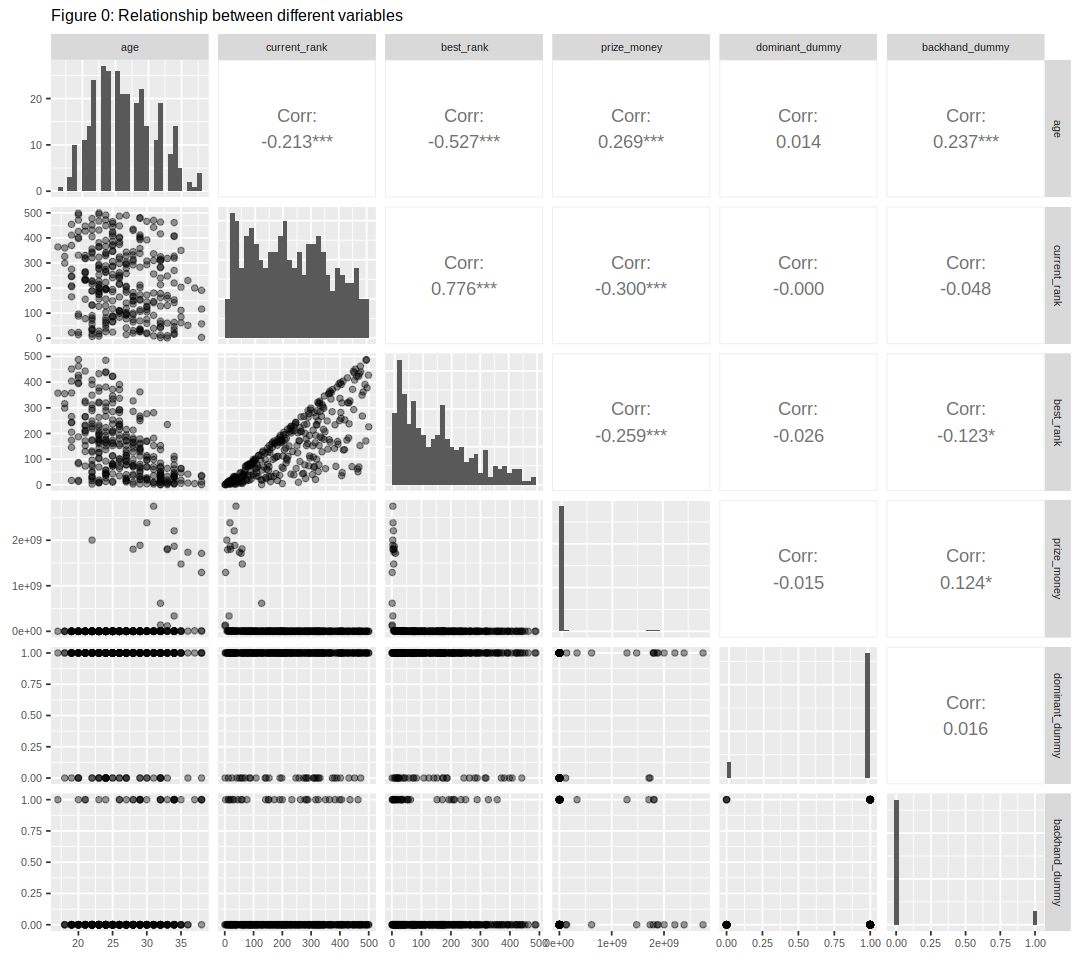

In [11]:
set.seed(1000) # DO NOT REMOVE

options(repr.plot.height = 8, repr.plot.width = 9)
 player_pairplot <- player_train |> 
                    ggpairs(lower = list(continuous = wrap('points', alpha = 0.4)),
                            diag = list(continuous = "barDiag")) +
                    ggtitle("Figure 0: Relationship between different variables")+
                    theme(text = element_text(size = 8))
player_pairplot

Figure 0: Shows the relationship between variables.

Looking at figure 0, we can see the correlation between our variables.

`age` ：

- positive correlation (0.246) with `prize_money`
- negative correlation (-0.189) with `current_rank`
- negative correlation (-0.510) with `best_rank`
- positive correlation (-0.240) with `backhand_dummy`
- no significant correlation with `dominant_dummy`

`current_rank`:
- negative correlation (-0.263) with `prize_money`
- positive correlation (-0.796) with `best_rank`
- no significant correlation with `backhand_dummy`
- no significant correlation with `dominant_dummy`


`best_rank`:
- negative correlation (-0.239) with `prize_money`
- no significant correlation with `backhand_dummy`
- no significant correlation with `dominant_dummy`


## Prize Money vs Variables Comparisons:
In the next step, we will analyze each variable in relation to Prize money and how they correlate.

First, we will compare Prize Money and Current Rank:

In [13]:
# Run to load packages
install.packages("parsnip")
library(parsnip)
install.packages("hardhat")
library(recipes)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


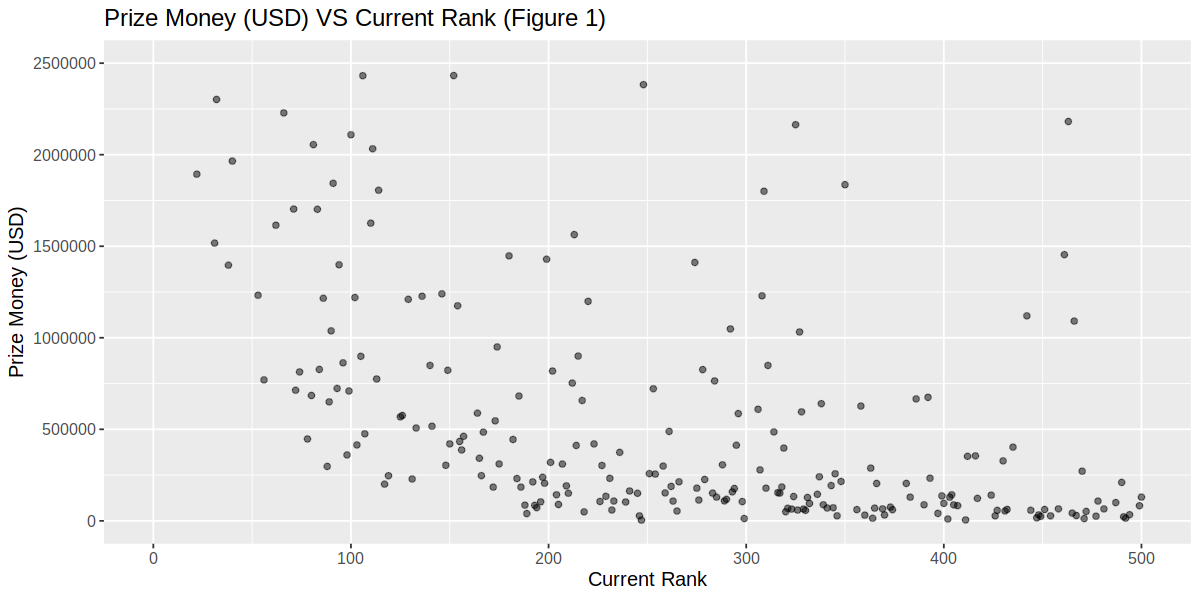

In [14]:
# Run to see plot comparing prize money and current rank
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_current_1 <- ggplot(player_train, aes(x = current_rank, y = prize_money)) +
  geom_point(alpha = 0.5) +
  xlab("Current Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Current Rank (Figure 1)")
small_plot_current_1

Figure 1: Plot comparing `prize_money` to `current_rank`

We can see the relation of Prize money and Current Rank based on Figure 1. In Figure 1, we observed that money and ranks have negative relationship: in most cases, the higher the rank, the more money, but as the players go lower in rank, they will receive less money. 

Next we will compare the relationship between Best Rank and Prize money:

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


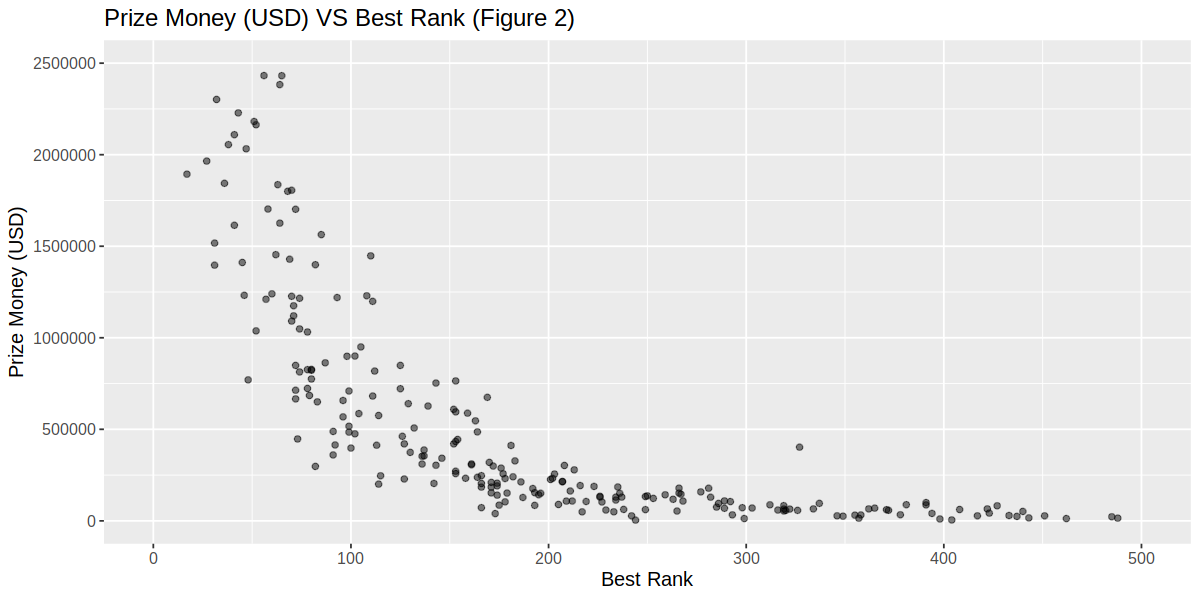

In [15]:
# Run to see plot comparing prize money and best rank 

options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_best <- ggplot(player_train, aes(x = best_rank, y = prize_money)) +
  geom_point(alpha = 0.5) +
  xlab("Best Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Best Rank (Figure 2)")
small_plot_best

Figure 2: Plot comparing `prize_money` to `best_rank`

Based on Figure 2, Prize Money vs. Best Rank, we can see a more precise negative relationship with both variables. The negative relationship is similar to the relationship in Figure 1: the higher the rank, the more money the player will receive, and as the ranks get lower, the less money a player will receive.

Based on Figure 1 and Figure 2, we observed that ranking will affect the amount of prize money the tennis player will receive.

Knowing that the rankings affect prize money, we want to see if the age of a player will relate to how much money they can receive. Below, we will create scatterplot to see the relationship between player's age in relation to prize money.

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


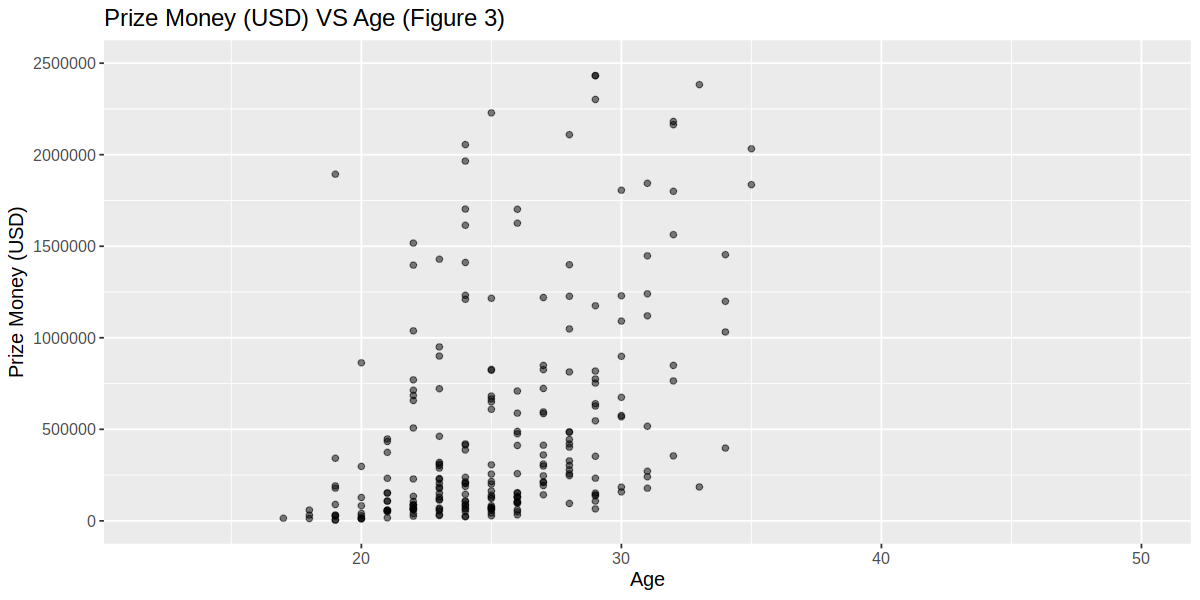

In [16]:
# Run to see plot comparing prize money and age

options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_age <- ggplot(player_train, aes(x = age, y = prize_money)) +
  geom_point(alpha = 0.5) +
  xlab("Age") +
  xlim(12, 50) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Age (Figure 3)")
small_plot_age

Figure 3: Plot comparing `prize_money` to `age`

With Figure 3, there is a slight positive relationship with age and prize money; Newer tennis athletes wouldn't receive much while older players would receive more money.

## Prize Money in Relation to Dominant and Backhand Variables:
We want to see how a player's prize money will be affected depending on what hand they use. Would right-handed players make more, less or the same amount as left-handed players? In order to compare this, we will analyze it using a boxplot for both their plays (when hand they usually play with) and their backhand (which hand they usually play when using backhand).
Before we start analyzing, we are going to simplify the codes to select the necessary variables we need to use. First, we will simplify and plot for the `dominant_dummy` variable.

Below, we simplified the `dominant_dummy` variable for both the training and testing data.

In [17]:
dominant_dummy_1 <- player_train |>
 select(dominant_dummy, prize_money)|>
  filter (dominant_dummy==1)

dominant_dummy_0 <- player_train |>
 select(dominant_dummy,  prize_money)|>
  filter (dominant_dummy==0)

dominant_dummy_1_test <- player_test |>
 select(dominant_dummy, prize_money)|>
  filter (dominant_dummy==1)

dominant_dummy_0_test <- player_test |>
 select(dominant_dummy,  prize_money)|>
  filter (dominant_dummy==0)

After simplifying and isolating the `dominant_dummy` variable from the main training/testing data, we will use the the simplified data (`dominant_dummy_1`: Right-handed backhand, `dominant_dummy_0`: Left-handed backhand) to create our boxplots.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 63 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_boxplot()`).”


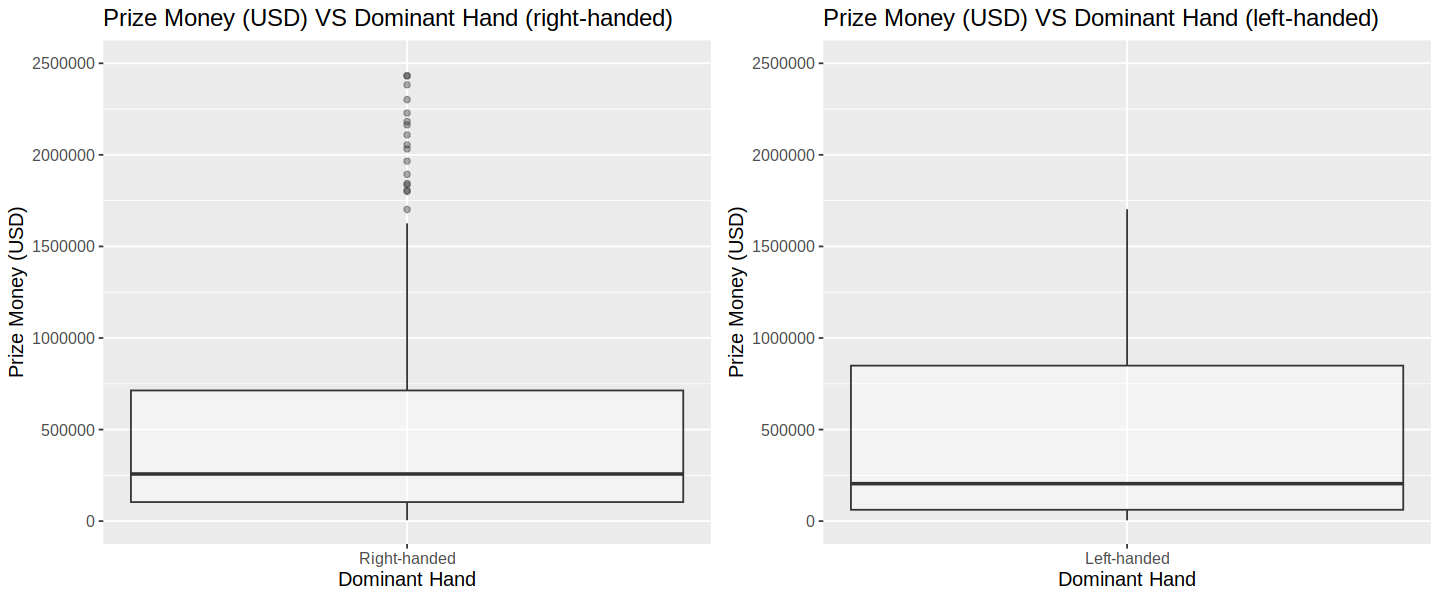

In [18]:
# Run to see plot comparing prize money and dominant hand (Figure 4)

options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_hand_1 <- ggplot(dominant_dummy_1, aes(x = dominant_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Dominant Hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed", "Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Dominant Hand (right-handed)")


options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_hand_0 <- ggplot(dominant_dummy_0, aes(x = dominant_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Dominant Hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed", "Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Dominant Hand (left-handed)")


options(repr.plot.width = 12, repr.plot.height = 5) 
small_plot_hand <- plot_grid(
small_plot_hand_1,
  small_plot_hand_0,
     nrow = 1
 )

small_plot_hand

Figure 4: Plot comparing `prize_money` to `dominant_hand`

As shown in Figure 4, Quartile 1 (lower quartile) of the prizes are roughly the same in both groups. The median (middle quartile / Quartile 2) is very close between right-handed players and left-handed players. The boxplot of right-handed player is comparatively short. This suggests that there is a greater range of variation in overall prize money for left-handed players compared to right-handed group. There are more outliers (observations that are numerically very different from the rest of the data) in the right-handed group.

The next variable we want to summarize for is the backhand usage. Thus, we will be simplifying the data to isolate `backhand_dummy` from our training and testing data and using the summarized data to create our box plots. Below will be the simplified data for our backhand variable.

In [19]:
backhand_dummy_1 <- player_train |>
 select(backhand_dummy, prize_money)|>
  filter(backhand_dummy==1)

backhand_dummy_0 <- player_train |>
 select(backhand_dummy,  prize_money)|>
  filter(backhand_dummy==0)

backhand_dummy_1_test <- player_test |>
 select(backhand_dummy, prize_money)|>
  filter(backhand_dummy==1)

backhand_dummy_0_test <- player_test |>
 select(backhand_dummy,  prize_money)|>
  filter(backhand_dummy==0)

Just like what we did for the dominant hand variable, we will do the same fr the backhand dummy variables; After simplifying and isolating the `backhand_dummy` variable from the main training/testing data, we will use the the simplified data (`backhand_dummy_1`: Right-handed backhand, `backhand_dummy_0`: Left-handed backhand) to create our boxplots.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 14 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 59 rows containing non-finite values (`stat_boxplot()`).”


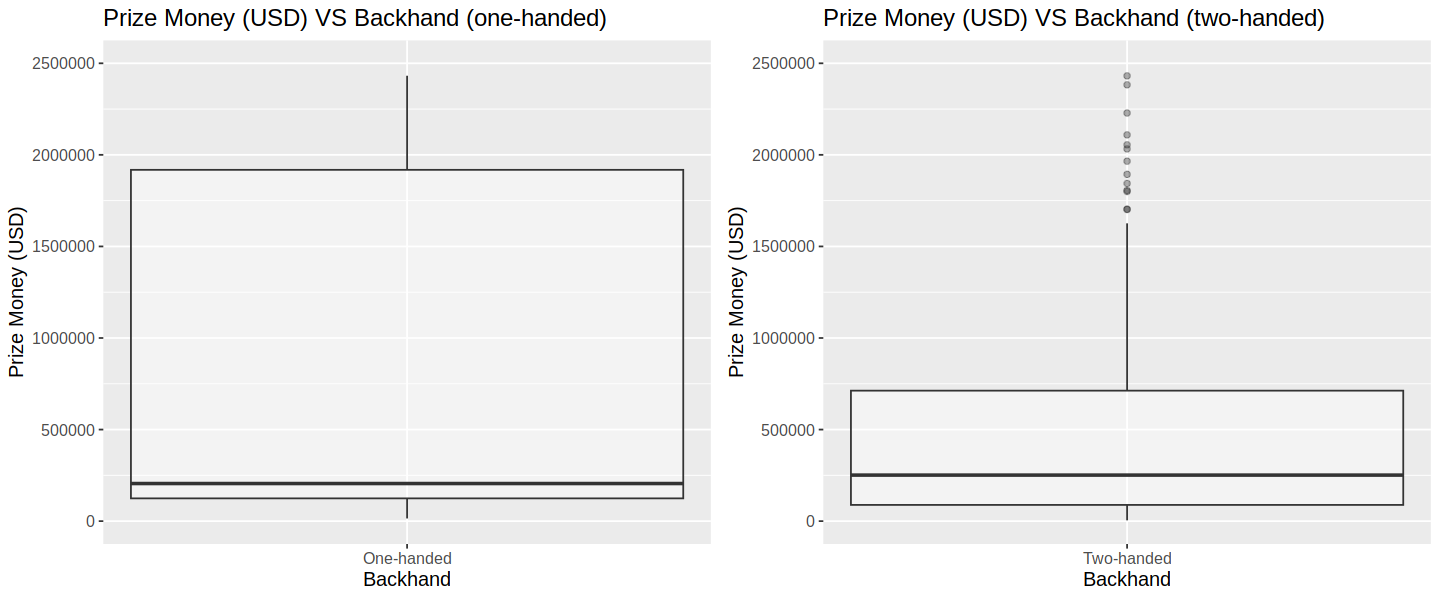

In [20]:
# Run to see plot comparing prize money and backhand use

options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_backhand_1 <- ggplot(backhand_dummy_1, aes(x = backhand_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Backhand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed","One-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Backhand (one-handed)")

small_plot_backhand_0 <- ggplot(backhand_dummy_0, aes(x = backhand_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Backhand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed","One-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Backhand (two-handed)")

options(repr.plot.width = 12, repr.plot.height = 5) 
small_plot_backhand <- plot_grid(
small_plot_backhand_1,
small_plot_backhand_0,
     nrow = 1
 )

small_plot_backhand


Figure 5: Plot comparing `prize_money` to `backhand`

As shown in Figure 5, Quartile 1 (lower quartile) of the prizes are roughly the same in both groups. The medians of two-handed group is slightly higher then one-handed group. The boxplot of two-handed player is much shorter. This suggests that there is a greater range of variation in overall prize money for one-handed players. There are more outliers in the two-handed group.

## Model: Model Predictions (Current Rank)

After creating and interpreting the different variables vs `prize_money`, we will now calculate for our data's linear regression. Below is the code use to create our linear regression model.

In [21]:
# Run this cell to create linear regression model
lm_spec <- linear_reg() |>
           set_engine("lm") |>
           set_mode("regression")

Now that we created our general specification `lm_spec` for our model, we will use it to calculate the linear regression for the different variables vs prize money:

First variable we will compare is `current_rank` vs `prize_money` for the training data and the testing data (Figure 6 & 7). Below will be the linear regression for the training data's `current_rank` and `prize_money`.

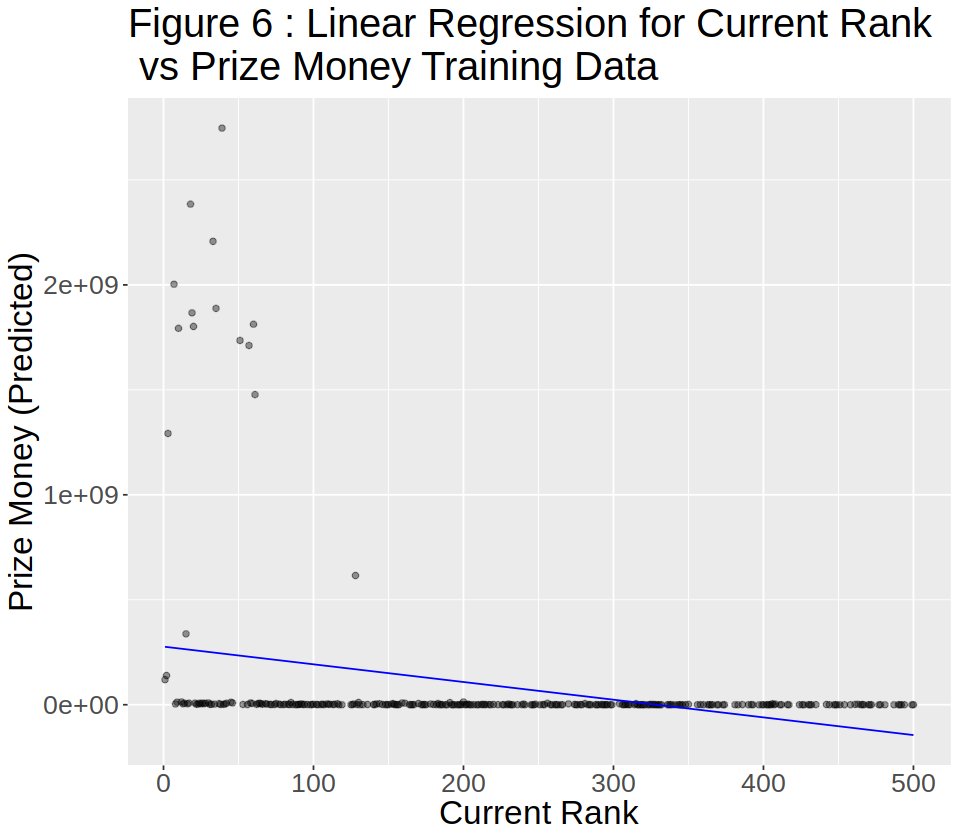

In [22]:
lm_recipe_current <- recipe(prize_money ~ current_rank, data = player_train)

lm_fit_current <- workflow() |>
  add_recipe(lm_recipe_current) |>
  add_model(lm_spec) |>
  fit(data = player_train)

options(repr.plot.width = 8, repr.plot.height = 7)

 current_preds <- lm_fit_current |>
   predict(player_train) |>
   bind_cols(player_train)

lm_predictions_current <- current_preds |>
     ggplot(aes(x = current_rank, y = prize_money)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = current_rank, y = .pred), 
             color = "blue") +
         xlab("Current Rank") +
         ylab("Prize Money (Predicted)") +
         theme(text = element_text(size = 20))+
         ggtitle("Figure 6 : Linear Regression for Current Rank \n vs Prize Money Training Data")
lm_predictions_current

#Figure 6

`lm_predictions_current` visualizes the relationship between the current rank and the predicted prize money for the training set. The blue line represents the model's predicted values, while the transparent points represent the actual data points. For figure 6, we can see that the linear line is downward sloping, suggesting that `current_rank` will have a negative correlation in the data set.

To see if our prediction is correct, we will analyze the linear regression for `current_rank` vs prize money in the testing data below.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


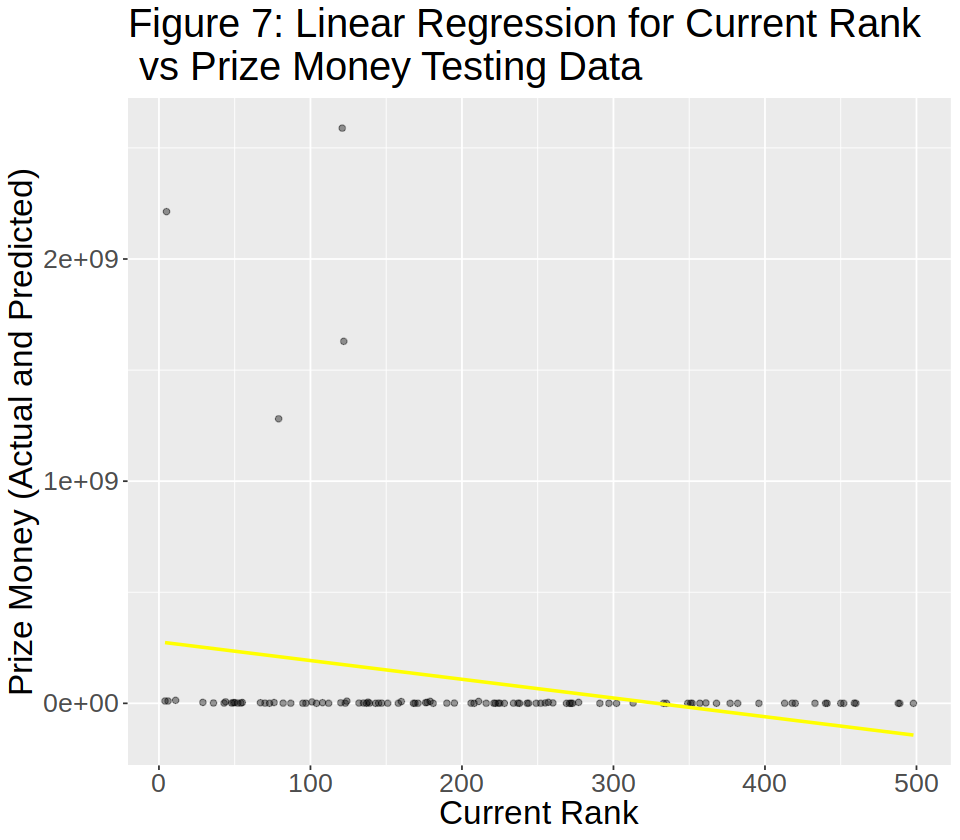

In [23]:
options(repr.plot.width = 8, repr.plot.height = 7)


test_preds_current <- predict(lm_fit_current, player_test)
test_preds_final_current <- bind_cols(test_preds_current, player_test)

lm_predictions_current_test <- ggplot(data = player_test, aes(x = current_rank, y = prize_money)) +
  geom_point(alpha = 0.4) +
  geom_line(data = test_preds_final_current, aes(x = current_rank , y = .pred), color = "yellow", size = 1) +
      labs(x = "Current Rank", y = "Prize Money (Actual and Predicted)") +
  ggtitle("Figure 7: Linear Regression for Current Rank \n vs Prize Money Testing Data") +
  theme(text = element_text(size = 20))


lm_predictions_current_test

#Figure 7

Figure 7 shows the relationship between current rank and prize money but for the testing data. The yellow line in this figure represents the linear regression of the testing data. Just like the training data, the testing data of the current rank linear regression also shows a downward sloping linear line, representing that it also has a negative correlation to the testing data. Thus, the training and testing data provides insight on the regression model for `current_rank`: changes in `current_rank` will provide a negative change towards `prize_money`. This might be because as rank goes lower, so does the amount of money being earned becomes lower too.

## Model: Model Predictions (Best Rank)

After interpreting the linear regression of current rank affects prize money, we want to see how best rank also affects prize money. Following the same steps of the current rank analysis, we will create a linear regression scatterplot for the training and training data.

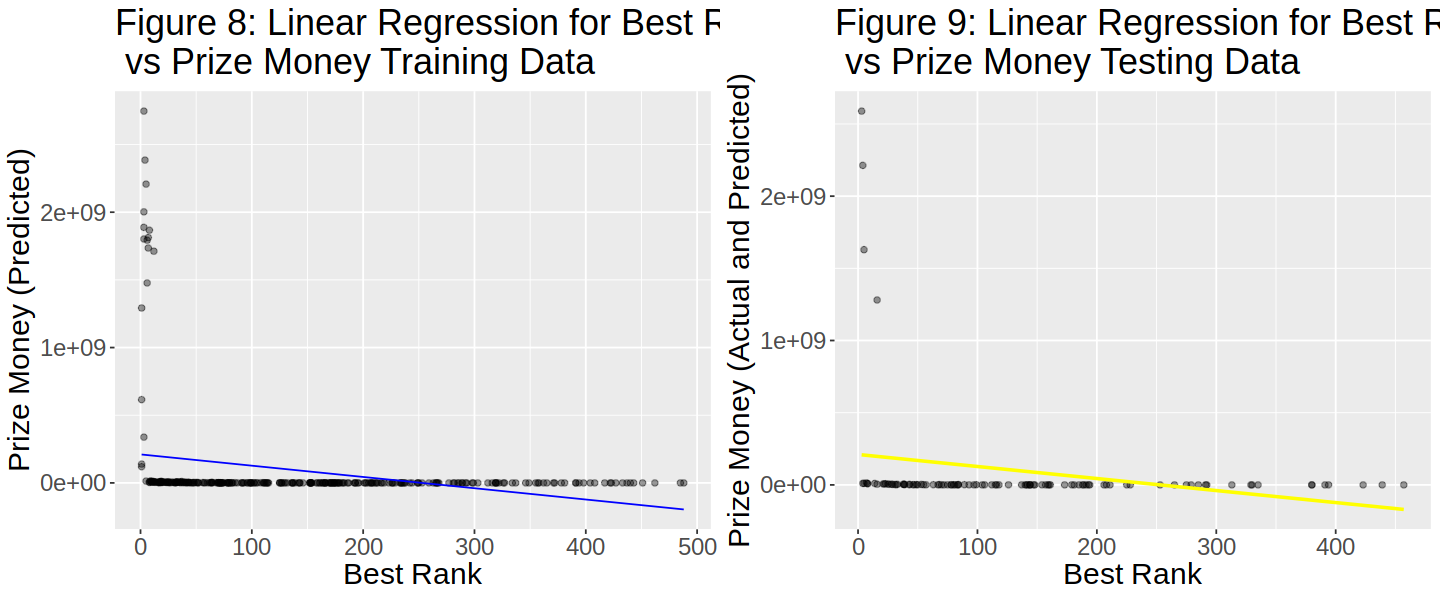

In [24]:
lm_recipe_best <- recipe(prize_money ~ best_rank, data = player_train)

lm_fit_best <- workflow() |>
  add_recipe(lm_recipe_best) |>
  add_model(lm_spec) |>
  fit(data = player_train)

# Best Rank Training Set
best_preds <- lm_fit_best |>
   predict(player_train) |>
   bind_cols(player_train)

lm_predictions_best_train <- best_preds |>
     ggplot(aes(x = best_rank, y = prize_money)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = best_rank, y = .pred), 
             color = "blue") +
         xlab("Best Rank") +
         ylab("Prize Money (Predicted)") +
         theme(text = element_text(size = 20))+
         ggtitle("Figure 8: Linear Regression for Best Rank \n vs Prize Money Training Data")+
         theme(text = element_text(size = 18))

#Best Rank Testing Set
test_preds_best <- predict(lm_fit_best, player_test)
test_preds_final_best <- bind_cols(test_preds_best, player_test)

lm_predictions_best_test <- ggplot(data = player_test, aes(x = best_rank, y = prize_money)) +
  geom_point(alpha = 0.4) +
  geom_line(data = test_preds_final_best, aes(x = best_rank , y = .pred), color = "yellow", size = 1) +
      labs(x = "Best Rank", y = "Prize Money (Actual and Predicted)") +
  ggtitle("Figure 9: Linear Regression for Best Rank \n vs Prize Money Testing Data")+
  theme(text = element_text(size = 18))

# Side by Side comparison
options(repr.plot.width = 12, repr.plot.height = 5) 
lm_predictions_best<- plot_grid(lm_predictions_best_train,
                               lm_predictions_best_test,
                               nrow = 1)
lm_predictions_best

Figures 8 & 9 both compare how best rank affects prize money. The blue linear line shows the training set best rank regression while the yellow line shows the testing data best rank regression. Comparing the two figures, both the training and testing data sets show a downward sloping line, representing that the `best_rank` variable has a negative correlation with prize money too.

## Model: Model Predictions (Age)

Knowing that `current_rank` and `best_rank` both have a negative correlation with the outcome of prize money, we want to see how age affects the outcome of prize money too. We will use the training and testing data with `age` and `prize_money` isolated and make a scatterplot once again to compare the outcomes.

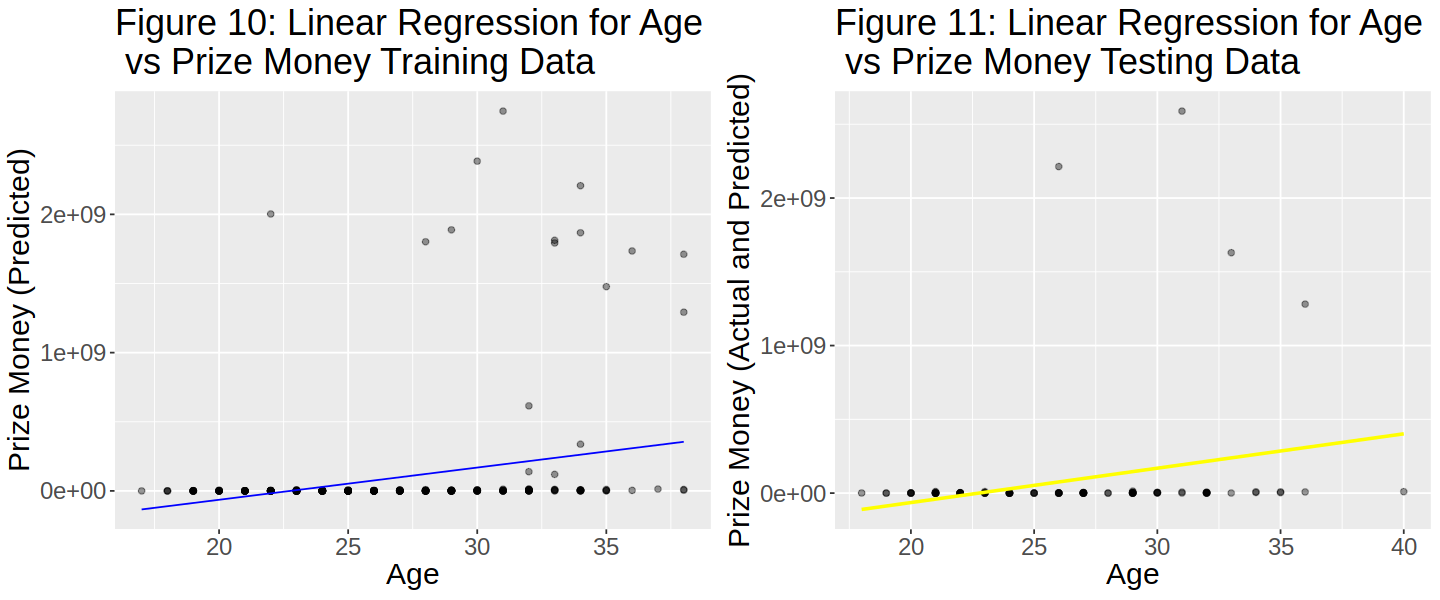

In [25]:
lm_recipe_age <- recipe(prize_money ~ age, data = player_train)

# Training Set
lm_fit_age <- workflow() |>
  add_recipe(lm_recipe_age) |>
  add_model(lm_spec) |>
  fit(data = player_train)

age_preds <- lm_fit_age |>
   predict(player_train) |>
   bind_cols(player_train)

lm_predictions_age_train <- age_preds |>
     ggplot(aes(x = age, y = prize_money)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = age, y = .pred), 
             color = "blue") +
         xlab("Age") +
         ylab("Prize Money (Predicted)") +
         ggtitle("Figure 10: Linear Regression for Age \n vs Prize Money Training Data")+
         theme(text = element_text(size = 18))

# Testing Set
test_preds_age <- predict(lm_fit_age, player_test)
test_preds_final_age <- bind_cols(test_preds_age, player_test)

lm_predictions_age_test <- ggplot(data = player_test, aes(x = age, y = prize_money)) +
  geom_point(alpha = 0.4) +
  geom_line(data = test_preds_final_age, aes(x = age , y = .pred), color = "yellow", size = 1) +
      labs(x = "Age", y = "Prize Money (Actual and Predicted)") +
      ggtitle("Figure 11: Linear Regression for Age \n vs Prize Money Testing Data")+
      theme(text = element_text(size = 18))

options(repr.plot.width = 12, repr.plot.height = 5) 
lm_predictions_age<- plot_grid(lm_predictions_age_train,
                               lm_predictions_age_test,
                               nrow = 1)
lm_predictions_age

Figure 10 & 11 shows the linear regression of age vs prize money for the training and testing data sets. Both linear regression graphs shows an upward sloping line, representing that unlike `best_rank` and `current_rank`, `age` will have a positive correlation to `prize_money`. Age may have a positive correlation to prize money because as a player becomes older, they would have more experience in tennis competitions.

## Model: Model Predictions (Dominant Hand)

Now that we analyzed our major variables affecting prize money, we want to analyze if a player's dominant hand will have an affect to prize money too. We want to calculate for the dominant hand's linear regression for the training and testing data below.

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 63 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_boxplot()`).”


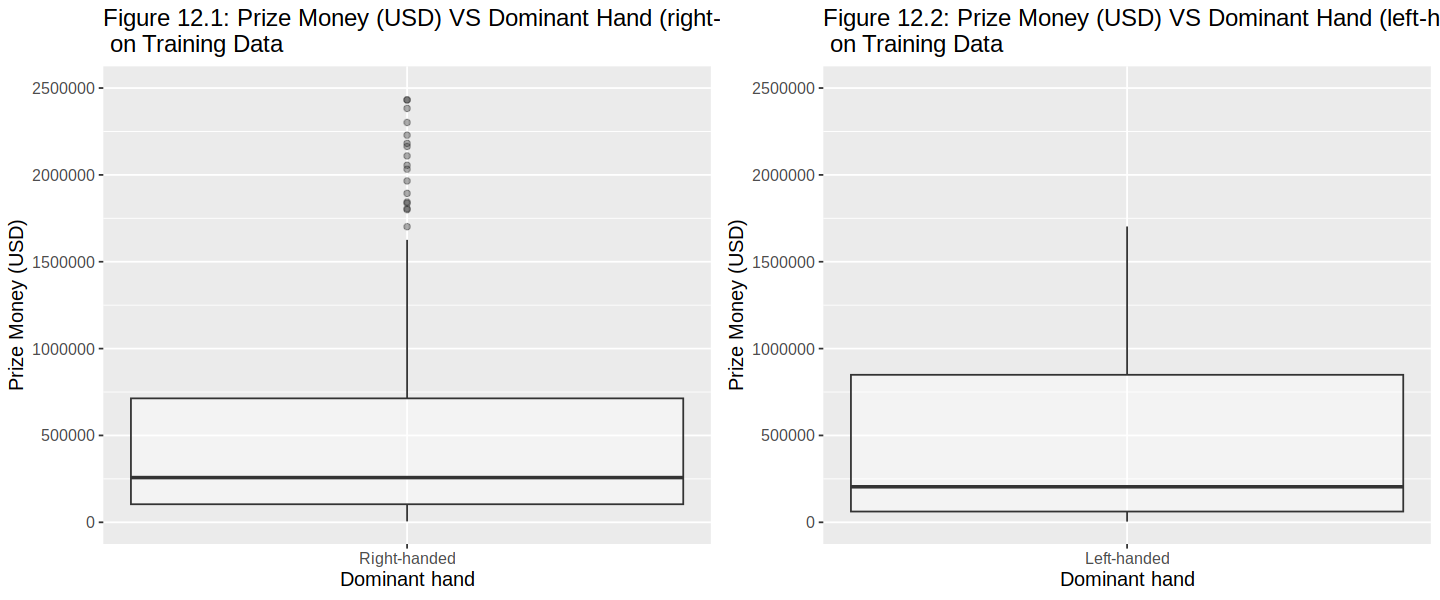

In [26]:
#Right-handed
lm_recipe_dominant_1 <- recipe(prize_money ~ dominant_dummy, data = dominant_dummy_1)

lm_fit_dominant_1 <- workflow() |>
  add_recipe(lm_recipe_dominant_1) |>
  add_model(lm_spec) |>
  fit(data = dominant_dummy_1)

dominant_1_preds <- lm_fit_dominant_1 |>
   predict(dominant_dummy_1) |>
   bind_cols(dominant_dummy_1)

lm_predictions_dominant_1 <- dominant_1_preds |>
     ggplot(aes(x = dominant_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed","Right-handed")) +
  theme(text = element_text(size = 12)) +
  labs(x="Dominant hand", y="Prize Money (USD)", color = "Dominant hand") +
  ggtitle("Figure 12.1: Prize Money (USD) VS Dominant Hand (right-handed)\n on Training Data")

#Left-handed
lm_recipe_dominant_0 <- recipe(prize_money ~ dominant_dummy, data = dominant_dummy_0)

lm_fit_dominant_0 <- workflow() |>
  add_recipe(lm_recipe_dominant_0) |>
  add_model(lm_spec) |>
  fit(data = dominant_dummy_0)

dominant_0_preds <- lm_fit_dominant_0 |>
   predict(dominant_dummy_0) |>
   bind_cols(dominant_dummy_0)

lm_predictions_dominant_0 <- dominant_0_preds |>
     ggplot(aes(x = dominant_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed","Right-handed")) +
  theme(text = element_text(size = 12)) +
  labs(x="Dominant hand", y="Prize Money (USD)", color = "Dominant hand") +
  ggtitle("Figure 12.2: Prize Money (USD) VS Dominant Hand (left-handed)\n on Training Data")


options(repr.plot.width = 12, repr.plot.height = 5) 
lm_predictions_dominant <- plot_grid(lm_predictions_dominant_1,
                                     lm_predictions_dominant_0,
                                     nrow = 1)
lm_predictions_dominant

Figures 12.1 & 12.2 shows the comparison of predicted prize money in regards to left-handed and right-handed players for the training data. We decided to make them side by side to help us visualize it better and it makes it easy to compare the distribution of the predicted prize money for each hand. As shown in Figure 12, Quartile 1 of the prizes are roughly the same in both trained groups. The median prize (middle quartile / Quartile 2) of the prizes are also very similar in both trained groups. The boxplot of right-handed player is comparatively short. This suggests that there is a greater range of variation in overall prize money for left-handed players compared to prize money for right-handed players. There are more outliers in the right-handed group.
To see if our training data prediction is correct for the whole data set, we will graph the testing set data for left-handed and right-handed dominant hands to compare it with the training set.

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 23 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


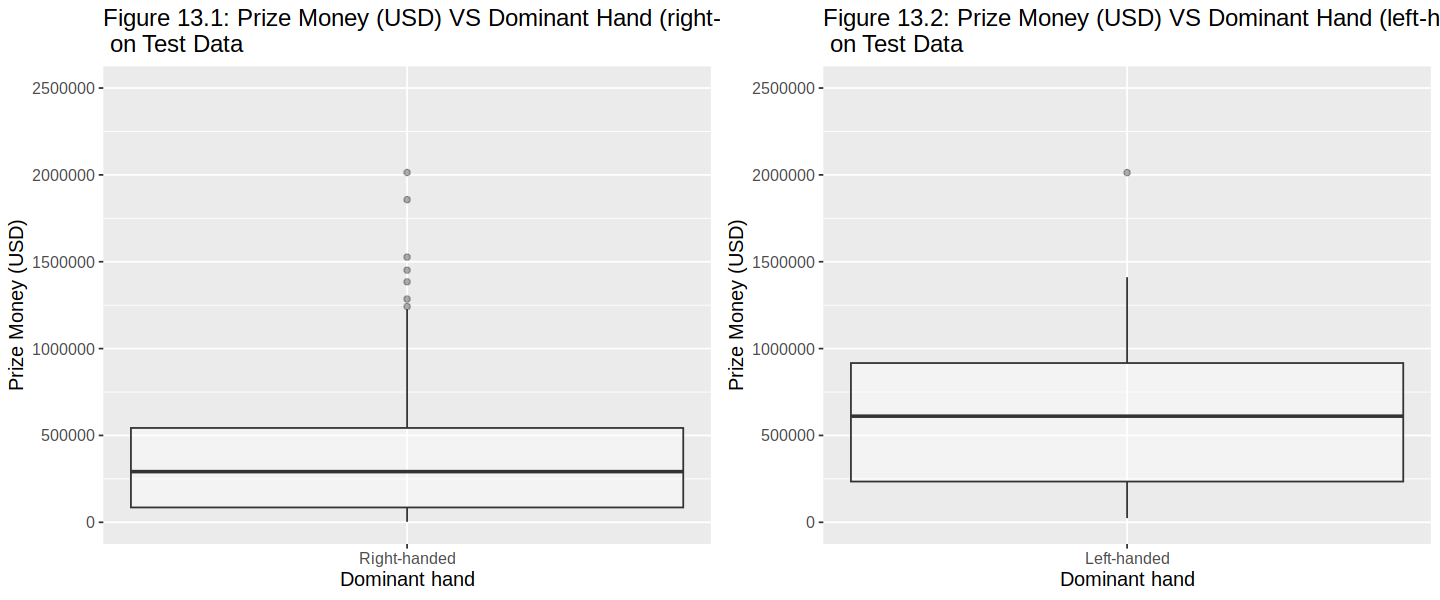

In [27]:
#Right-handed
lm_recipe_dominant_1_test <- recipe(prize_money ~ dominant_dummy, data = dominant_dummy_1_test)

lm_fit_dominant_1_test <- workflow() |>
  add_recipe(lm_recipe_dominant_1_test) |>
  add_model(lm_spec) |>
  fit(data = dominant_dummy_1_test)

dominant_1_preds_test <- lm_fit_dominant_1_test |>
   predict(dominant_dummy_1_test) |>
   bind_cols(dominant_dummy_1_test)

lm_predictions_dominant_1_test <- dominant_1_preds_test |>
     ggplot(aes(x = dominant_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlab("Dominant hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed","Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 13.1: Prize Money (USD) VS Dominant Hand (right-handed)\n on Test Data")

#Left-handed
lm_recipe_dominant_0_test <- recipe(prize_money ~ dominant_dummy, data = dominant_dummy_0_test)

lm_fit_dominant_0_test <- workflow() |>
  add_recipe(lm_recipe_dominant_0_test) |>
  add_model(lm_spec) |>
  fit(data = dominant_dummy_0_test)

dominant_0_preds_test <- lm_fit_dominant_0_test |>
   predict(dominant_dummy_0_test) |>
   bind_cols(dominant_dummy_0_test)

lm_predictions_dominant_0_test <- dominant_0_preds_test |>
     ggplot(aes(x = dominant_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlab("Dominant hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed","Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 13.2: Prize Money (USD) VS Dominant Hand (left-handed)\n on Test Data")


options(repr.plot.width = 12, repr.plot.height = 5) 
lm_predictions_dominant_test <- plot_grid(lm_predictions_dominant_1_test,
                                          lm_predictions_dominant_0_test,
                                          nrow = 1)
lm_predictions_dominant_test

Figures 13.1 & 13.2 shows the comparison of predicted prize money in regards to left-handed and right-handed players for the testing data. The median for left-handed group is higher than median for right-handed group. The boxplot of right-handed player is much shorter. This suggests that there is a greater range of variation in overall prize money for left-handed players compared to prize money for right-handed players. 

Comparing the training and testing data set, it shows that both sets may not accurately show us which if left-handed or right-handed players will make more money. 

## Model: Model Predictions (BackHand)

Finally, we will analyze the how backhand plays will affect the prize money earned by tennis players.

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 14 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 59 rows containing non-finite values (`stat_boxplot()`).”


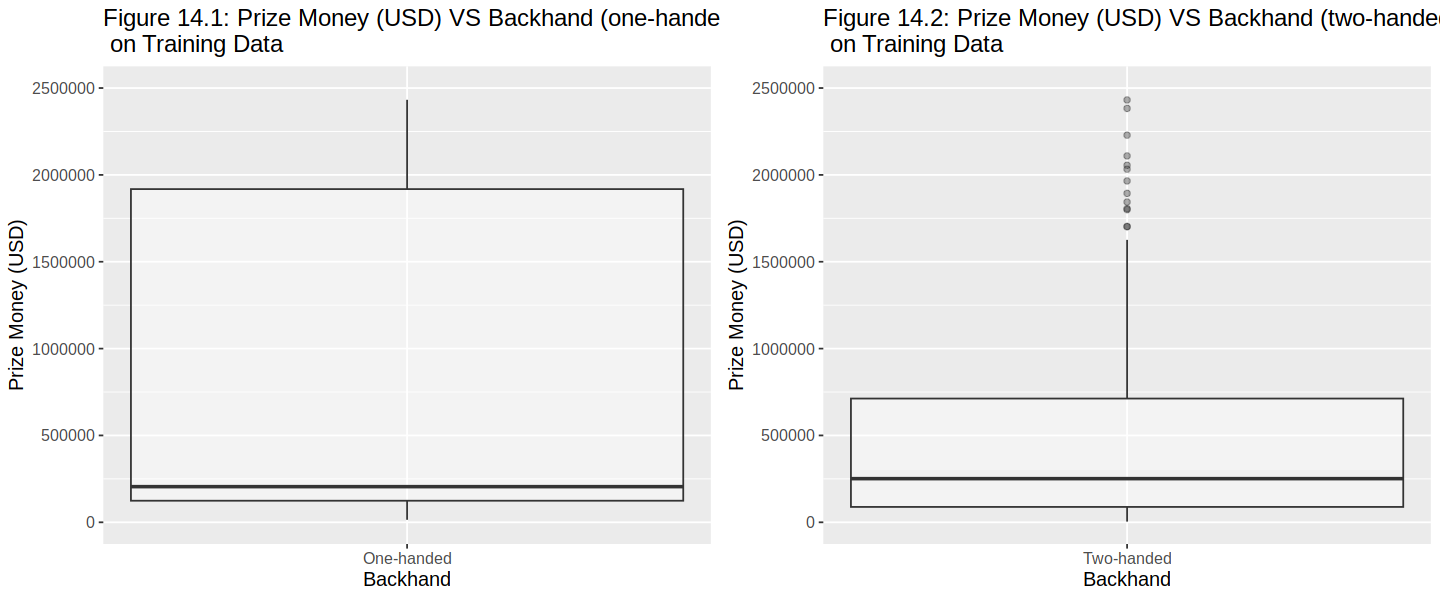

In [28]:
#TRAINING SET

#One-handed
lm_recipe_backhand_1 <- recipe(prize_money ~ backhand_dummy, data = backhand_dummy_1)

lm_fit_backhand_1 <- workflow() |>
  add_recipe(lm_recipe_backhand_1) |>
  add_model(lm_spec) |>
  fit(data = backhand_dummy_1)

backhand_1_preds <- lm_fit_backhand_1 |>
   predict(backhand_dummy_1) |>
   bind_cols(backhand_dummy_1)

lm_predictions_backhand_1 <- backhand_1_preds |>
     ggplot(aes(x = backhand_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed","One-handed")) +
  labs(x="Backhand", y="Prize Money (USD)",color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 14.1: Prize Money (USD) VS Backhand (one-handed)\n on Training Data")

#Two-handed
lm_recipe_backhand_0 <- recipe(prize_money ~ backhand_dummy, data = backhand_dummy_0)

lm_fit_backhand_0 <- workflow() |>
  add_recipe(lm_recipe_backhand_0) |>
  add_model(lm_spec) |>
  fit(data = backhand_dummy_0)

backhand_0_preds <- lm_fit_backhand_0 |>
   predict(backhand_dummy_0) |>
   bind_cols(backhand_dummy_0)

lm_predictions_backhand_0 <- backhand_0_preds |>
     ggplot(aes(x = backhand_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed","One-handed")) +
  labs(x="Backhand", y="Prize Money (USD)",color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 14.2: Prize Money (USD) VS Backhand (two-handed)\n on Training Data")


options(repr.plot.width = 12, repr.plot.height = 5) 
lm_predictions_backhand <- plot_grid(lm_predictions_backhand_1,
                                     lm_predictions_backhand_0,
                                     nrow = 1)
lm_predictions_backhand

Figures 14.1 & 14.2 predicted prize money in regards the player's backhands for the training data, using playing with a one-handed backhand or a two-handed backhand. Quartile 1 of the prizes are roughly the same in both groups. The median values for two group are very close, too. The boxplot of two-handed player is much shorter. This suggests that there is a greater range of variation in overall prize money for one-handed players. There are more outliers in the two-handed group.

Once again, we will now calculate for the testing data backhand linear regression to see if our training data prediction is correct for the whole data set.

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from a rank-deficient fit may be misleading”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 7 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_boxplot()`).”


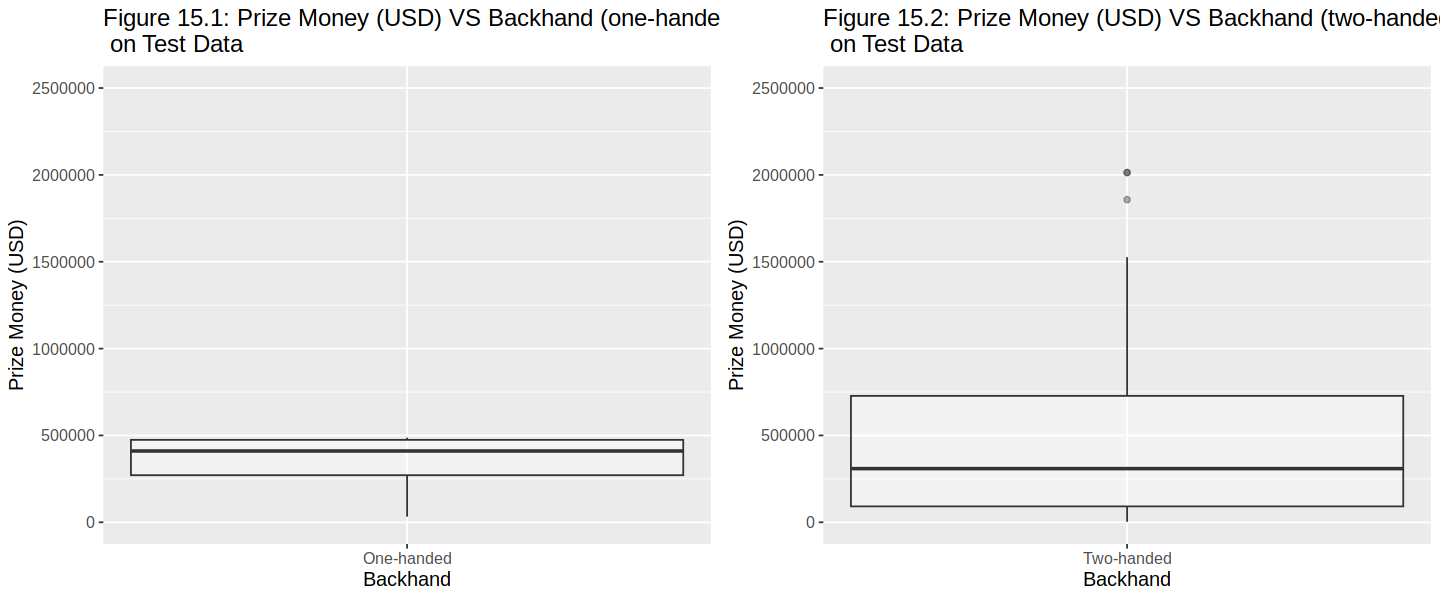

In [29]:
#One-handed
lm_recipe_backhand_1_test <- recipe(prize_money ~ backhand_dummy, data = backhand_dummy_1_test)

lm_fit_backhand_1_test <- workflow() |>
  add_recipe(lm_recipe_backhand_1_test) |>
  add_model(lm_spec) |>
  fit(data = backhand_dummy_1_test)

backhand_1_preds_test <- lm_fit_backhand_1_test |>
   predict(backhand_dummy_1_test) |>
   bind_cols(backhand_dummy_1_test)

lm_predictions_backhand_1_test <- backhand_1_preds_test |>
     ggplot(aes(x = backhand_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed","One-handed")) +
  labs(x="Backhand", y="Prize Money (USD)",color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 15.1: Prize Money (USD) VS Backhand (one-handed)\n on Test Data")

#Two-handed
lm_recipe_backhand_0_test <- recipe(prize_money ~ backhand_dummy, data = backhand_dummy_0_test)

lm_fit_backhand_0_test <- workflow() |>
  add_recipe(lm_recipe_backhand_0_test) |>
  add_model(lm_spec) |>
  fit(data = backhand_dummy_0_test)

backhand_0_preds_test <- lm_fit_backhand_0_test |>
   predict(backhand_dummy_0_test) |>
   bind_cols(backhand_dummy_0_test)

lm_predictions_backhand_0_test <- backhand_0_preds_test |>
     ggplot(aes(x = backhand_dummy, y = prize_money)) +
 geom_boxplot(alpha=0.4) +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed","One-handed")) +
  labs(x="Backhand", y="Prize Money (USD)",color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Figure 15.2: Prize Money (USD) VS Backhand (two-handed)\n on Test Data")


options(repr.plot.width = 12, repr.plot.height = 5) 
lm_predictions_backhand_test <- plot_grid(lm_predictions_backhand_1_test,
                                          lm_predictions_backhand_0_test,
                                          nrow = 1)
lm_predictions_backhand_test

Figures 15.1 & 15.2 shows the comparison of predicted prize money vs backhand plays for testing data. Quartile 1 of one-handed group ranges more than Quartile 1 for two-handed group. The median prize of one-handed players is  higher than two-handed players. The boxplot of one-handed player is much shorter. This suggests that there is a greater range of variation in overall prize money for two-handed players compared to prize money for one-handed players.
The training data and the testing data sets does not accurately allow us to predict if whichever backhanded plays would earn more prize money.

## Model: Linear Regression (Multivariable)
After analyzing the different variables in comparison to prize money, we want to calculate for the RMSPE of the data. We want to calculate the RMSPE of both the training data set and testing training set and compare them. This purpose of the RMSPE in these cases is to test the accuracy of our model. Thus, we first want to create the training set model we will use to predict our accuracy.

In [30]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe_train <- recipe(prize_money ~ ., data = player_train) |>
  update_role(prize_money, new_role = "outcome")


lm_fit_train <- workflow() |>
  add_recipe(lm_recipe_train) |>
  add_model(lm_spec)|>
  fit(data=player_train)

player_preds <- lm_fit_train |>
   predict(player_train) |>
   bind_cols(player_train)

lm_rmspe_train <- lm_fit_train |>
         predict(player_train) |>
         bind_cols(player_train) |>
         metrics(truth = prize_money, estimate = .pred)|>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_train 

[1] 363147220

After creating the model for our training model, we calculated for the model's RMSPE, which ended up being 
363147220.389566. With this information, we don't know how accurate our training model is compared to our training set, which leads to our next step: Calculating for the RMSPE of the testing set.

In [31]:
lm_recipe_test <- recipe(prize_money ~ ., data = player_test) |>
  update_role(prize_money, new_role = "outcome")


lm_fit_test <- workflow() |>
  add_recipe(lm_recipe_test) |>
  add_model(lm_spec)|>
  fit(data=player_test)

player_preds <- lm_fit_test |>
   predict(player_test) |>
   bind_cols(player_test)

lm_rmspe_test <- lm_fit_test |>
         predict(player_test) |>
         bind_cols(player_test) |>
         metrics(truth = prize_money, estimate = .pred)|>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe_test

[1] 364481432

The RMSPE we found for our testing data is 
364481432.188911. The purpose of the testing RMSPE is to help us assess the general ability of the model. 

We extract our coefficient values from our model object as shown below:

In [32]:
mcoeffs <- lm_fit_test |>
             extract_fit_parsnip() |>
             tidy()

mcoeffs

#Table 2

term           estimate     std.error   statistic  p.value  
1 (Intercept)    -178593658.1 305672161.0 -0.5842654 0.5603844
2 age              10180434.4  10523191.3  0.9674284 0.3357114
3 current_rank      -327453.9    502053.3 -0.6522294 0.5157801
4 best_rank         -162492.2    661055.2 -0.2458073 0.8063455
5 dominant_dummy   71676201.4  96946409.1  0.7393384 0.4614688
6 backhand_dummy  191019766.2 126446671.9  1.5106745 0.1340892

And then use those slopes to write a mathematical equation to describe the prediction plane:

prize money = `β0` + `β1`⋅(age) + `β2`⋅(current rank) + `β3`⋅(best rank) + `β4`⋅(dominant hand) + `β5`⋅(backhand)

`β0` is the vertical intercept of the hyperplane (the prize money when all variables are 0)

`β1` is the slope for the first predictor (the rate of change in prize money as players age, holding all other control variables constant)

`β2` is the slope for the second predictor (the rate of change in prize money as a player's current ranking falls, holding all other control variables constant)

`β3` is the slope for the third predictor (the rate of change in prize money as a player's best ranking falls, holding all other control variables constant)

`β4` is the slope for the fourth predictor (the rate of change in prize money when a player uses his right hand, holding all other control variables constant)

`β5` is the slope for the fifth predictor (the rate of change in prize money when a player hits the ball with a one-handed backhand, holding all other control variables constant)

Finally, we can fill in the values for `β0`, `β1`, `β2`, `β3`, `β4`, `β5` from the model output above to create the equation of the plane of best fit to the data:

prize money = -178593658.1 + 10180434.4⋅(age) − 327453.9⋅(current rank) - 162492.2⋅(best rank) + 71676201.4⋅(dominant hand) + 191019766.2⋅(backhand)


## Discussion:
Our findings are consistent with our expectations, that the best rank and current rank have negative impact on increasing prize money (since smaller ranking points represent higher rankings, the negative coefficient means that the higher ranking points, the lower the prize money, and the lower ranking points, the higher the prize money). A paper that examines the relationship between tennis rankings and prize money states that in 2017, the top 100 tennis players in the rankings received about 90 % of the total prize money on the tour that year, and inequality is also evident in the top 100, with the top 20 players earning more than 55 of all prize money, while the bottom half of the top 100 received less than one-fifth of the prize money of the top 100 (JEANGOUT, 2018). The findings from our linear regression model is consistent with the conclusion from the paper, that the higher the rank (smaller ranking points), the more prize money.

For age, the results of β1 have a positive impact on increasing prize money. The prize money increases by $10,180,434.4 for each additional year of age. This positive relationship is inconsistent with our previous analysis of prize money decreasing with age.
For dominant hands, our result shows that right-handed players will have an additional $71,676,201.4 in prize money. 
For backhand use, our results show that one-handed players will have an additional $191,019,766.2 in prize money. The results for the backhand variable are consistent with our expectation that one-handed players are more dominant. 

In summary, the overall results of our linear regression model are unsatisfactory, this is because our dataset is not fitted enough for a linear regression model. For example, from Figure 2 we can see that the relationship between current rank and prize money is non-linear correlation, so in the future maybe we should use a more accurate regression model. Also, we found that our dataset is too small and there are too much variation between the data (prize money). It is very likely that these issues led to the low fit of our linear regression model. In the future, we can refine the data in our dataset to achieve a better linear regression result.

We can use our findings to strategically predict a tennis player's career. Understanding the impact of different variables on prize money may allow players to make informed decisions about their playing styles and when to participate in tournaments, aiming to improve their rankings. It might also help tournament organizers and sponsors to make decisions about prize distribution and sponsorship deals. Since this model adds a quantitative aspect to a player's performance, fans and marketers could use this model to evaluate and celebrate the success of players. 

The question this might lead to is the interplay between different variables. Is there a correlation between them? How do changes in one variable influence the other, and how does this interplay impact prize money? Understanding these dynamics could provide more nuanced insights into a player's career trajectory.

## Works Cited
JEANGOUT, C. (2018). Analysis of the evolution of inequalities in prize money due to ranking in professional tennis. Analysis of the Evolution of Inequalities in Prize Money due to Ranking in Professional Tennis | Mémoire UCL. https://dial.uclouvain.be/memoire/ucl/en/object/thesis%3A14394 

Nag, Utathya. Tennis Rankings: Everything You Need to Know - Olympics.Com, 5 Apr. 2022, olympics.com/en/news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics

## Cited Source (data): 
Ultimate Tennis Statistics. (n.d.). https://www.ultimatetennisstatistics.com/ 